# Data Science for Business - Exploring Flight Delays in NYC


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Case Description

### Flight Delays

Flight delays are a common problem in the airline industry. They can be caused by a variety of factors, such as weather, air traffic control, and mechanical issues. Delays can be frustrating for passengers and costly for airlines. In this case study, we will work with a dataset containing flight delay data for all flights departing NYC in 2013. Besides delays, the dataset also includes useful meta-data on airlines, airports, weather, and planes. [More...](https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf).

The dataset structure is illustrated in the following diagram:

![Dataset Structure](https://github.com/olivermueller/ds4b-2024/blob/main/Session_02/nycflights13.png?raw=1)


## Load Data

Let's start by loading the `flights` table, taking a look at the first few rows, and displaying the dimensions of the table.

In [28]:
flights = pd.read_csv('https://raw.githubusercontent.com/olivermueller/ds4b-2024/3014cdf1ad22beee81fe27adb73dcb317c6f296f/Session_02/flights.csv')

In [29]:
flights.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T10:00:00Z
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01T11:00:00Z
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01T11:00:00Z
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01T11:00:00Z
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01T11:00:00Z


In [4]:
flights.shape

(336776, 19)

We continue by loading the remaining tables and taking a look at the first few rows of each table.

In [5]:
airlines = pd.read_csv('https://raw.githubusercontent.com/olivermueller/ds4b-2024/3014cdf1ad22beee81fe27adb73dcb317c6f296f/Session_02/airlines.csv')
airlines.head(10)

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [7]:
airports = pd.read_csv('https://raw.githubusercontent.com/olivermueller/ds4b-2024/3014cdf1ad22beee81fe27adb73dcb317c6f296f/Session_02/airports.csv')
airports.head(10)

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
5,0A9,Elizabethton Municipal Airport,36.371222,-82.173417,1593,-5,A,America/New_York
6,0G6,Williams County Airport,41.467306,-84.506778,730,-5,A,America/New_York
7,0G7,Finger Lakes Regional Airport,42.883565,-76.781232,492,-5,A,America/New_York
8,0P2,Shoestring Aviation Airfield,39.794824,-76.647191,1000,-5,U,America/New_York
9,0S9,Jefferson County Intl,48.053809,-122.810644,108,-8,A,America/Los_Angeles


In [ ]:
# Your task: Load the *planes* and *weather* tables from CSV files, store them a variables called weather and planes and take a look at the first few rows of each table.

In [8]:
planes = pd.read_csv('https://raw.githubusercontent.com/olivermueller/ds4b-2024/3014cdf1ad22beee81fe27adb73dcb317c6f296f/Session_02/planes.csv')
planes.head(10)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
5,N105UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
6,N107US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
7,N108UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
8,N109UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
9,N110UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan


In [9]:
weather = pd.read_csv('https://raw.githubusercontent.com/olivermueller/ds4b-2024/3014cdf1ad22beee81fe27adb73dcb317c6f296f/Session_02/weather.csv')
weather.head(10)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
5,EWR,2013,1,1,6,37.94,28.04,67.21,240.0,11.50780,NaN,0.0,1012.4,10.0,2013-01-01T11:00:00Z
6,EWR,2013,1,1,7,39.02,28.04,64.43,240.0,14.96014,NaN,0.0,1012.2,10.0,2013-01-01T12:00:00Z
7,EWR,2013,1,1,8,39.92,28.04,62.21,250.0,10.35702,NaN,0.0,1012.2,10.0,2013-01-01T13:00:00Z
8,EWR,2013,1,1,9,39.92,28.04,62.21,260.0,14.96014,NaN,0.0,1012.7,10.0,2013-01-01T14:00:00Z
9,EWR,2013,1,1,10,41.00,28.04,59.65,260.0,13.80936,NaN,0.0,1012.4,10.0,2013-01-01T15:00:00Z


## Prepare Data

Before we start exploring the data, we need to prepare it. This includes cleaning the data (e.g., filtering rows with missing values or outliers), creating new features, and merging tables.

### Filter out observations

We start by filtering the `flights` table to exclude flights with a `distance` or `air_time` smaller or equal to 0.

In [26]:
# Filter rows
flights = flights[flights['distance'] > 0]
flights.shape

(336776, 20)

In [27]:
# Your task: Filter out all flights with an air time of 0
flights = flights[flights['air_time'] != 0]
flights.shape

(336776, 20)

### Construct new variables

The way how times are represented in this dataset is quite strange (look at the values `dep_time` or `arr_time` and the separate `hour` and `minute` columns). We will use the timestamps in the `time_hour` column to extract new time variables (`month` and `weekday`) and then remove the column.

In [30]:
flights['time_hour'] = pd.to_datetime(flights['time_hour'], utc=True)
flights['month_name'] = flights['time_hour'].dt.month_name()
flights['weekday_name'] = flights['time_hour'].dt.day_name()
flights = flights.drop(columns=['time_hour'])

In [31]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,month_name,weekday_name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,January,Tuesday
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,January,Tuesday
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,January,Tuesday
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,January,Tuesday
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,January,Tuesday


### Join tables

Finally, we will merge some of the tables to create a single table that contains all the information we need for our visualizations. For this, we will use different types of SQL-style joins.

![Types of Joins](https://github.com/olivermueller/ds4b-2024/blob/main/Session_02/join-venn.png?raw=1)

We primarily use inner joins for matching observations when keys are equal:

![Inner Join](https://github.com/olivermueller/ds4b-2024/blob/main/Session_02/join-inner.png?raw=1)


Let's demonstrate the differences between an **inner join** and a **left join** with some examples.

In [32]:
flights_and_airlines = flights.merge(airlines, on='carrier', how='inner')
flights_and_airlines.shape

(336776, 21)

In [35]:
flights_and_airlines = flights.merge(airlines, on='carrier', how='left')
flights_and_airlines.shape

(336776, 21)

In [36]:
# Your task: Do the same with flights and planes.
flights_and_planes = flights.merge(planes, on='tailnum', how='left')
flights_and_planes.shape

(336776, 28)

Left join of `flights` and `airports` using `origin` (left table) and `faa` (right table) as keys.

In [37]:
flights_and_origin_airports = flights.merge(airports, left_on='origin', right_on='faa', how='left')
flights_and_origin_airports.shape

(336776, 28)

Left join of `flights` and `airports` using `dest` (left table) and `faa` (right table) as keys.

In [38]:
flights_and_dest_airports = flights.merge(airports, left_on='dest', right_on='faa', how='left')
flights_and_dest_airports.shape

(336776, 28)

Left join of `flights` and `weather` using a composite key consisting of `origin`, `month`, `day`, and `hour`.


In [39]:
flights_and_weather = flights.merge(weather, on=['origin', 'month', 'day', 'hour'], how='left')
flights_and_weather.shape

(336776, 31)

We can now join all the tables (`flights`, `airlines`, `planes`, `airports`, `weather`) into one comprehensive table.

In [40]:
flights_all = (
    flights
    .merge(airlines, on='carrier', how='left')
    .merge(planes, on='tailnum', how='left')
    .merge(airports, left_on='origin', right_on='faa', how='left', suffixes=('_origin', '_dest'))
    .merge(airports, left_on='dest', right_on='faa', how='left', suffixes=('', '_dest'))
    .merge(weather, on=['origin', 'month', 'day', 'hour'], how='left')
)

flights_all.head()


,year_x,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01T11:00:00Z


In [41]:
flights_all.shape

(336776, 56)

In [42]:
flights_all.columns

Index(['year_x', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'month_name', 'weekday_name', 'name_origin', 'year_y', 'type',
       'manufacturer', 'model', 'engines', 'seats', 'speed', 'engine', 'faa',
       'name_dest', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone', 'faa_dest',
       'name', 'lat_dest', 'lon_dest', 'alt_dest', 'tz_dest', 'dst_dest',
       'tzone_dest', 'year', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib', 'time_hour'],
      dtype='object')

The joins created some duplicate columns. Let's remove them and renaming columns for clarity.

In [43]:
flights_all = flights_all.drop(columns=['year_y', 'time_hour'])

flights_all = flights_all.rename(columns={
    'year_x': 'year',
})

In [44]:
flights_all.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,year,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,2013.0,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,2013.0,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,2013.0,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,2013.0,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,2013.0,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0


In [45]:
flights_all.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'month_name', 'weekday_name', 'name_origin', 'type', 'manufacturer',
       'model', 'engines', 'seats', 'speed', 'engine', 'faa', 'name_dest',
       'lat', 'lon', 'alt', 'tz', 'dst', 'tzone', 'faa_dest', 'name',
       'lat_dest', 'lon_dest', 'alt_dest', 'tz_dest', 'dst_dest', 'tzone_dest',
       'year', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust',
       'precip', 'pressure', 'visib'],
      dtype='object')

## Explore Data through Visualizations

We will now visualize categorical and numerical variables to gain insights into the data. We will use the Seaborn library for this purpose. Seaborn is a data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. But it also offers a low-level interface for detailed customization of plots.


### Plots for Categorical Variables

We begin by plotting a bar chart of the number of flights by `origin` airport. The function `countplot` is used to show the counts of observations in each categorical bin using bars. Then we use the functions `title`, `xlabel`, and `ylabel` to set a title and labels of the x and y axes, respectively.


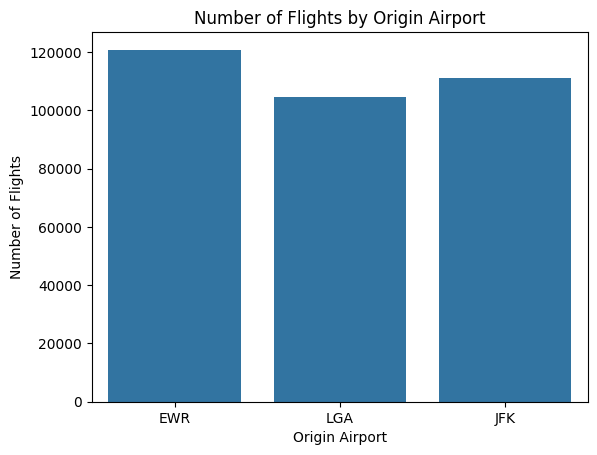

In [46]:
sns.countplot(data=flights_all, x='origin')
plt.title('Number of Flights by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.show()


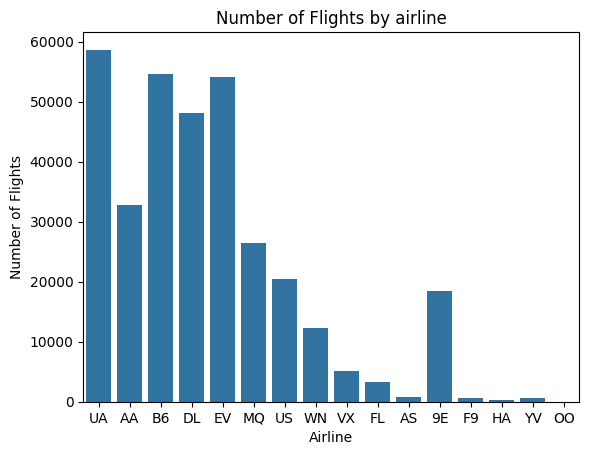

In [48]:
# Your task: Do the same for the number of flights by airline.
sns.countplot(data=flights_all, x='carrier')
plt.title('Number of Flights by airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()


To order the bars by frequency, we can use the `order` parameter of the `countplot` function.


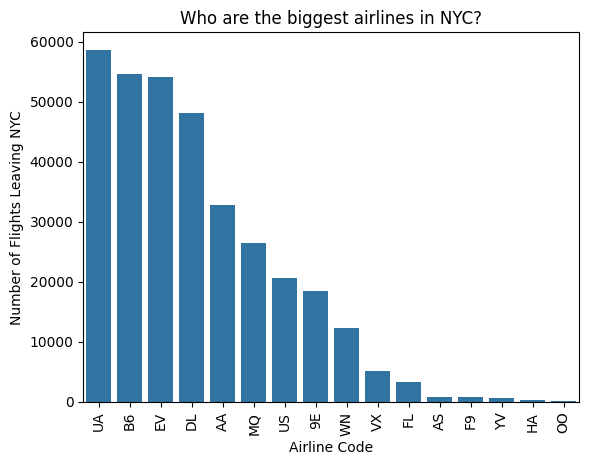

In [49]:
sns.countplot(data=flights_all, x='carrier', order=flights_all['carrier'].value_counts().index)
plt.title('Who are the biggest airlines in NYC?')
plt.xlabel('Airline Code')
plt.ylabel('Number of Flights Leaving NYC')
plt.xticks(rotation=90)
plt.show()


### Plots for Numerical Variables

Next, we explore the distribution of the `distance` of all flights using the `displot` function. Using the value *hist* for the `kind` parameter, we can plot a histogram. The *bins* parameter specifies the number of bins to use for the histogram.


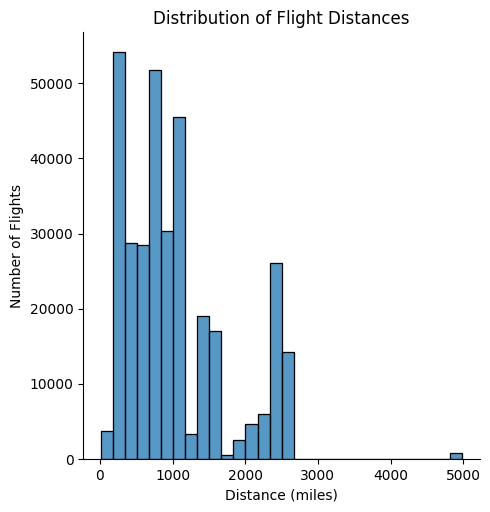

In [51]:
sns.displot(data=flights_all, kind='hist', x='distance', bins=30)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Flights')
plt.show()


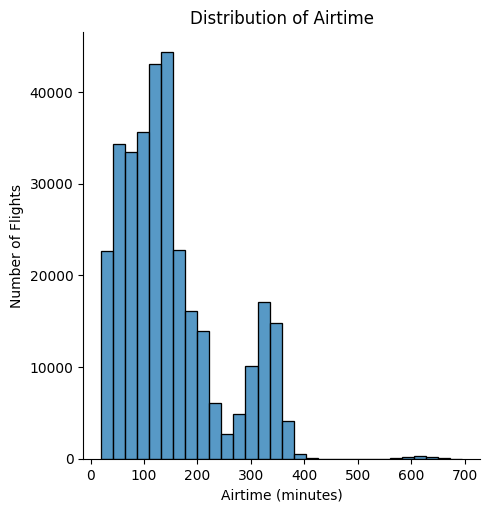

In [52]:
# Your turn: Do the same for airtime.
sns.displot(data=flights_all, kind='hist', x='air_time', bins=30)
plt.title('Distribution of Airtime')
plt.xlabel('Airtime (minutes)')
plt.ylabel('Number of Flights')
plt.show()


Using the value *kde* for the `kind` parameter, we can plot a kernel density estimate. The *fill* parameter specifies whether to fill the area under the KDE curve.

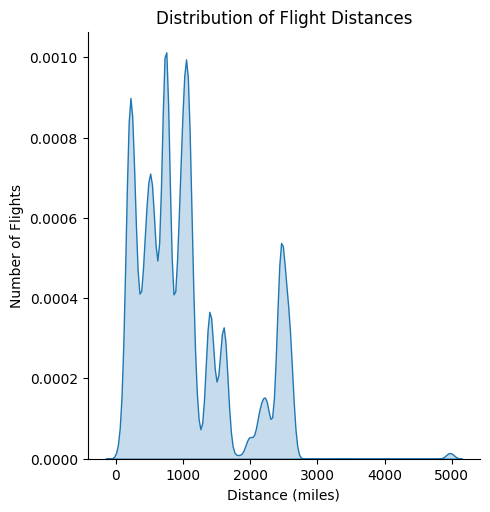

In [53]:
sns.displot(data=flights_all, kind='kde', x='distance', fill=True)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Flights')
plt.show()


If you want to create the same plot for different subsets of the data, you can use the `FacetGrid` function. It maps a low-level function to create a plot (here: `histplot`) to each subset of the data defined by the level of a categorical variable.

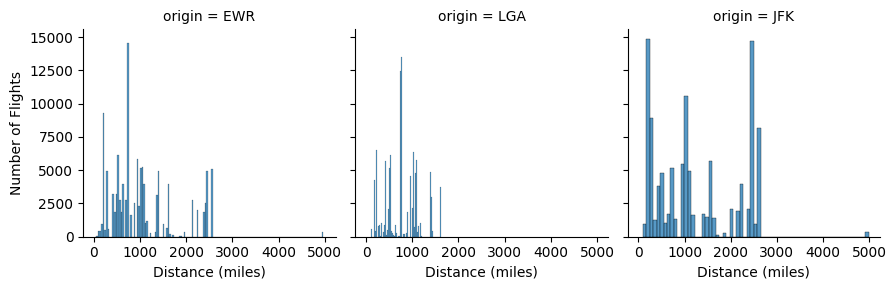

In [54]:
g = sns.FacetGrid(flights_all, col="origin")
g.map(sns.histplot, "distance")
g.set_axis_labels("Distance (miles)", "Number of Flights")
plt.show()


Box plots provide another alternative for visualizing the distribution of numerical variables. The low-level function `boxplot` can be used to create a box plot for a numerical variable (here: `arr_delay`), optinally grouped by a categorical variable (here: `origin`).

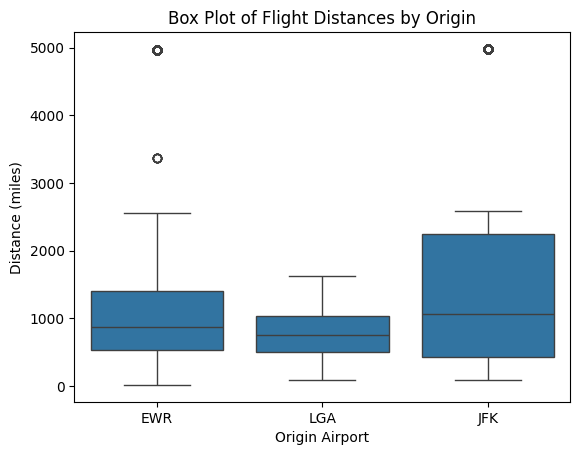

In [55]:
sns.boxplot(data=flights_all, y='distance', x='origin')
plt.title('Box Plot of Flight Distances by Origin')
plt.xlabel('Origin Airport')
plt.ylabel('Distance (miles)')
plt.show()


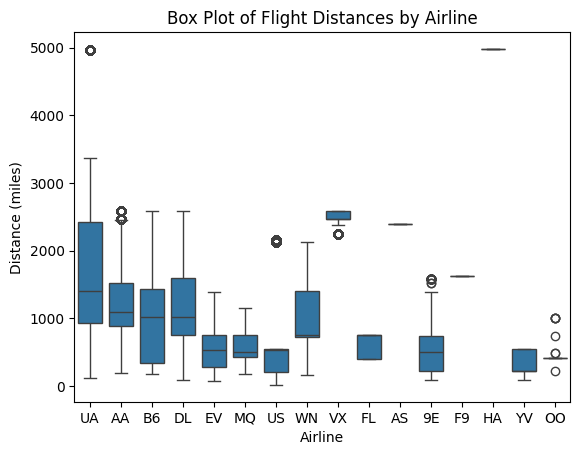

In [56]:
# Your turn: Do the same for airlines instead of origin airports.
sns.boxplot(data=flights_all, y='distance', x='carrier')
plt.title('Box Plot of Flight Distances by Airline')
plt.xlabel('Airline')
plt.ylabel('Distance (miles)')
plt.show()

The above plots show the relationship between a categorical and a numerical variable. We can also visualize the relationship between two numerical variables. The `relplot` function offers various options for this purpose. Here, we use the `scatterplot` kind to create a scatter plot of `distance` and `air_time`.

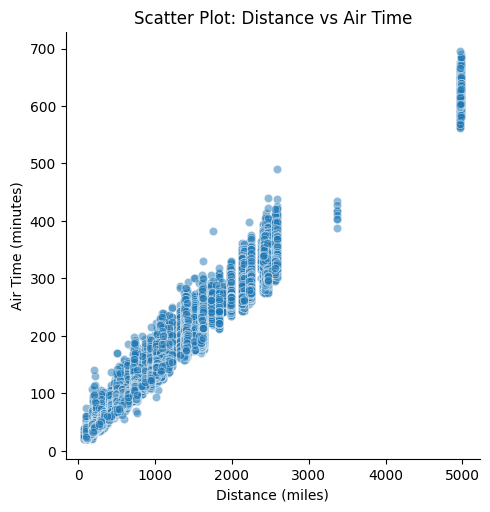

In [57]:
sns.relplot(data=flights_all, kind='scatter', x='distance', y='air_time', alpha=0.5)
plt.title('Scatter Plot: Distance vs Air Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (minutes)')
plt.show()


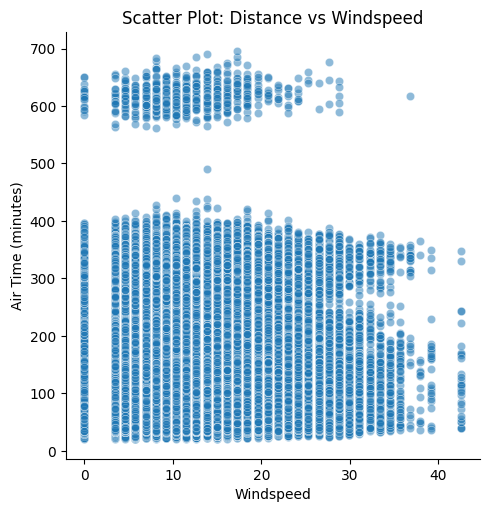

In [58]:
#Your task: Do the same for delay and a numerical weather variable of your choice.
sns.relplot(data=flights_all, kind='scatter', x='wind_speed', y='air_time', alpha=0.5)
plt.title('Scatter Plot: Distance vs Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Air Time (minutes)')
plt.show()
